- Edge detection with Sobel filter

Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Read image and show it

(512, 512)


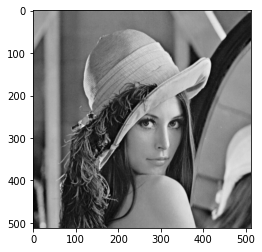

In [2]:
img = cv2.imread("Lenna.png", 0)
print(img.shape)
plt.imshow(img, cmap="gray")

Creating vertical edge filter

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


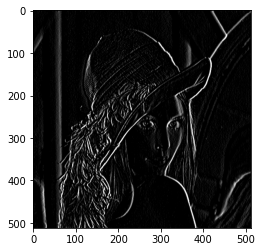

In [3]:
vertical_filter = np.zeros((3,3))
vertical_filter[:,0] = 1
vertical_filter[1,0] = 2
vertical_filter[:,2] = -1
vertical_filter[1,2] = -2
print(vertical_filter)
v_img = cv2.filter2D(img, -1, vertical_filter)
plt.imshow(v_img, cmap = "gray")

Creating horizontal edge filter

[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


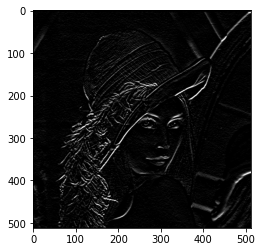

In [4]:
horizontal_filter = vertical_filter.T
print(horizontal_filter)
h_img = cv2.filter2D(img, -1, horizontal_filter)
plt.imshow(h_img, cmap = "gray")

Normalizing

   First solution ----------------------------------------------------------------------------------------------------------------- Second solution


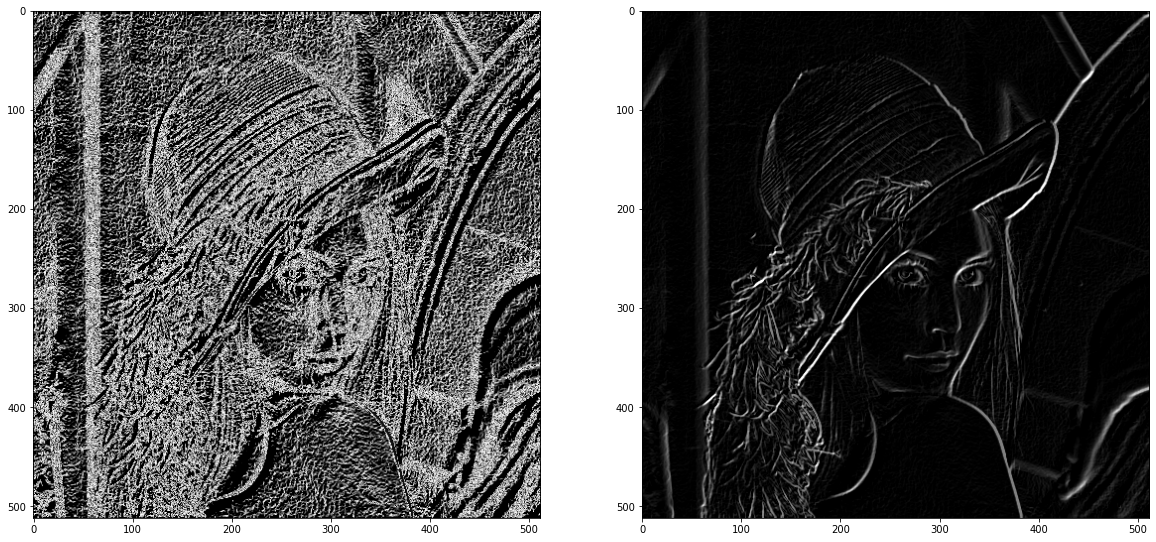

In [5]:
normalized_img = np.zeros(img.shape)

# first solution
normalized_img[:,:] = np.sqrt(np.power(h_img,2) + np.power(v_img,2))

# second solution
normalized_img_2 = normalized_img.copy()

normalized_img_2[:,:] = cv2.addWeighted(src1 = h_img, alpha = 0.5, src2 = v_img, beta = 0.5, gamma = 0)

f, axarr = plt.subplots(1,2,figsize=(20,20))
print("   First solution ----------------------------------------------------------------------------------------------------------------- Second solution")
axarr[0].imshow(normalized_img, cmap = "gray")
axarr[1].imshow(normalized_img_2, cmap = "gray")